## Introduction

In this notebook, I gathered datasets from different sources, and processed them to be ready for visualization.

In [2]:
# Import packages
## General
import pandas as pd

from pandas.api.types import CategoricalDtype

import numpy as np
## geojson file
from urllib.request import urlopen
import json
import urllib
import requests

import xlrd

# Visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'serif'})
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
import seaborn as sns

### 1. Zipcode and corresponding latitude/longitude data

Data source: [opendatasoft](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?refine.state=TX&location=11,29.78166,-95.33283&basemap=jawg.streets)


In [33]:
us_zip = pd.read_csv('original_data/us-zip-code-latitude-and-longitude.csv', sep=';')
print(us_zip.shape)
us_zip.head()

(43191, 8)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,55795,Willow River,MN,46.317812,-92.84315,-6,1,"46.317812,-92.84315"
1,45388,Yorkshire,OH,40.328535,-84.47938,-5,1,"40.328535,-84.47938"
2,39483,Foxworth,MS,31.218509,-89.90761,-6,1,"31.218509,-89.90761"
3,31503,Waycross,GA,31.205194,-82.37534,-5,1,"31.205194,-82.37534"
4,45833,Delphos,OH,40.841409,-84.34178,-5,1,"40.841409,-84.34178"


Subsets of State of Washington

In [10]:
wa_zip = us_zip.query('State == "WA"').copy()
wa_zip.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
7,98849,Riverside,WA,48.528793,-119.452760,-8,1,"48.528793,-119.45276"
72,99251,Spokane,WA,47.653568,-117.431742,-8,1,"47.653568,-117.431742"
80,98247,Everson,WA,48.900256,-122.320950,-8,1,"48.900256,-122.32095"
100,98004,Bellevue,WA,47.618371,-122.203080,-8,1,"47.618371,-122.20308"
102,98125,Seattle,WA,47.716648,-122.303080,-8,1,"47.716648,-122.30308"


#### Make subsets of Houston, San Antonio, Dallas, and Austin
These four cities are in the top 10 biggest cities in the US

In [9]:
tx_zip = us_zip.query('State == "TX"').copy()

- Houston

In [49]:
hst_zip = tx_zip.query('City == "Houston"').copy()
print(hst_zip.shape)
hst_zip.head()

(182, 8)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
6,77071,Houston,TX,29.647637,-95.517180,-6,1,"29.647637,-95.51718"
22,77006,Houston,TX,29.741878,-95.389440,-6,1,"29.741878,-95.38944"
68,77266,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"
81,77268,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"
91,77010,Houston,TX,29.754728,-95.362160,-6,1,"29.754728,-95.36216"


In [5]:
hst_zip.to_csv('processed_data/houston_zipcode_lat_lng.csv', index=False)

- San Antonio

In [6]:
sa_zip = tx_zip.query('City == "San Antonio"').copy()
print(sa_zip.shape)
sa_zip.head()

(90, 8)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
47,78239,San Antonio,TX,29.516130,-98.361610,-6,1,"29.51613,-98.36161"
95,78252,San Antonio,TX,29.335577,-98.701730,-6,1,"29.335577,-98.70173"
113,78295,San Antonio,TX,29.437532,-98.461582,-6,1,"29.437532,-98.461582"
124,78224,San Antonio,TX,29.333436,-98.539340,-6,1,"29.333436,-98.53934"
134,78291,San Antonio,TX,29.437532,-98.461582,-6,1,"29.437532,-98.461582"


In [7]:
sa_zip.to_csv('processed_data/san_antonio_zipcode_lat_lng.csv', index=False)

- Dallas

In [8]:
dls_zip = tx_zip.query('City == "Dallas"').copy()
print(dls_zip.shape)
dls_zip.head()

(122, 8)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
8,75353,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
16,75264,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
29,75205,Dallas,TX,32.836094,-96.795240,-6,1,"32.836094,-96.79524"
39,75301,Dallas,TX,32.767268,-96.777626,-6,1,"32.767268,-96.777626"
51,75230,Dallas,TX,32.901176,-96.790540,-6,1,"32.901176,-96.79054"


In [9]:
dls_zip.to_csv('processed_data/dallas_zipcode_lat_lng.csv', index=False)

- Austin

In [10]:
ast_zip = tx_zip.query('City == "Austin"').copy()
print(ast_zip.shape)
ast_zip.head()

(83, 8)


,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
1,78789,Austin,TX,30.326374,-97.771258,-6,1,"30.326374,-97.771258"
72,78773,Austin,TX,30.326374,-97.771258,-6,1,"30.326374,-97.771258"
103,78709,Austin,TX,30.326374,-97.771258,-6,1,"30.326374,-97.771258"
143,78745,Austin,TX,30.207559,-97.795750,-6,1,"30.207559,-97.79575"
173,78759,Austin,TX,30.406169,-97.757430,-6,1,"30.406169,-97.75743"


In [11]:
ast_zip.to_csv('processed_data/austin_zipcode_lat_lng.csv', index=False)

### 2. Home Value data
Zillow Home Value Index (ZHVI) of different home types\
Data source: [Zillow](https://www.zillow.com/research/data/)

#### 2.1 Geographical level: City
Used for analyzing and visualizing historical data on the level of city

In [12]:
city_1b = pd.read_csv('original_data/City_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
city_2b = pd.read_csv('original_data/City_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
city_3b = pd.read_csv('original_data/City_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
city_4b = pd.read_csv('original_data/City_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
city_5b = pd.read_csv('original_data/City_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
city_cd = pd.read_csv('original_data/City_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv')
city_sfr = pd.read_csv('original_data/City_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv')

**Make subsets of TX and Clean the Dataframe**

In [146]:
def tx_subset(df, home_type):
    tx_df = df.query('State=="TX"').copy()
    tx_df['HomeType'] = home_type
    tx_df_c = tx_df.drop(columns=['RegionID', 'RegionType', 'StateName'])
    tx_df_c.rename(columns={'RegionName': 'City'}, inplace=True)
    cols = tx_df_c.columns.tolist()
    cols = cols[-1:] + cols[:-1] # cols[-1:] generates a list containing only the last column label
    tx_df_c = tx_df_c[cols]
    return tx_df_c

In [147]:
tx_city_1b = tx_subset(city_1b, 'One Bedroom')
print(tx_city_1b.shape)
tx_city_1b.head()

(533, 307)


,HomeType,SizeRank,City,State,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
2,One Bedroom,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,71747.0,71887.0,71918.0,72217.0,...,112149.0,112496.0,112742.0,113091.0,113346.0,114359.0,115396.0,116949.0,117962.0,118954.0
4,One Bedroom,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,58982.0,58733.0,58584.0,58289.0,...,99864.0,100000.0,100102.0,100765.0,101131.0,101489.0,101997.0,102704.0,103607.0,104068.0
9,One Bedroom,9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,84781.0,83314.0,82332.0,80381.0,...,141385.0,142657.0,143523.0,143912.0,143871.0,143744.0,143810.0,143904.0,144890.0,145525.0
10,One Bedroom,10,Austin,TX,Austin-Round Rock,Travis County,139202.0,138835.0,137509.0,136284.0,...,283760.0,286451.0,288454.0,290290.0,292319.0,294717.0,297636.0,300851.0,304298.0,307055.0
16,One Bedroom,16,Fort Worth,TX,Dallas-Fort Worth-Arlington,Tarrant County,88460.0,88603.0,88913.0,89334.0,...,158290.0,158688.0,158918.0,159877.0,160933.0,162646.0,165493.0,168208.0,170421.0,171486.0


In [15]:
tx_city_2b = tx_subset(city_2b, 'Two Bedrooms')
tx_city_3b = tx_subset(city_3b, 'Three Bedrooms')
tx_city_4b = tx_subset(city_4b, 'Four Bedrooms')
tx_city_5b = tx_subset(city_5b, 'Five Bedrooms And More')
tx_city_cd = tx_subset(city_cd, 'Condominium and Co-operative Homes')
tx_city_sfr = tx_subset(city_sfr, 'Single-family Residences')

**Concatenate the dataframes sliced above**

In [148]:
dfs = [tx_city_1b, tx_city_2b, tx_city_3b, tx_city_4b, tx_city_5b, tx_city_cd, tx_city_sfr]
tx_city_zhvi = pd.concat(dfs, ignore_index=True)
print(tx_city_zhvi.shape)
tx_city_zhvi.head()

(6542, 307)


,HomeType,SizeRank,City,State,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,71747.0,71887.0,71918.0,72217.0,...,112149.0,112496.0,112742.0,113091.0,113346.0,114359.0,115396.0,116949.0,117962.0,118954.0
1,One Bedroom,4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,58982.0,58733.0,58584.0,58289.0,...,99864.0,100000.0,100102.0,100765.0,101131.0,101489.0,101997.0,102704.0,103607.0,104068.0
2,One Bedroom,9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,84781.0,83314.0,82332.0,80381.0,...,141385.0,142657.0,143523.0,143912.0,143871.0,143744.0,143810.0,143904.0,144890.0,145525.0
3,One Bedroom,10,Austin,TX,Austin-Round Rock,Travis County,139202.0,138835.0,137509.0,136284.0,...,283760.0,286451.0,288454.0,290290.0,292319.0,294717.0,297636.0,300851.0,304298.0,307055.0
4,One Bedroom,16,Fort Worth,TX,Dallas-Fort Worth-Arlington,Tarrant County,88460.0,88603.0,88913.0,89334.0,...,158290.0,158688.0,158918.0,159877.0,160933.0,162646.0,165493.0,168208.0,170421.0,171486.0


In [149]:
tx_city_zhvi['HomeType'] = pd.Categorical(tx_city_zhvi['HomeType'], ordered=True,
                                          categories=['Condominium and Co-operative Homes', 
                                                      'Single-family Residences',
                                                      'One Bedroom',
                                                      'Two Bedrooms',
                                                      'Three Bedrooms',
                                                      'Four Bedrooms',
                                                      'Five Bedrooms And More'])

In [150]:
tx_city_zhvi.to_csv('processed_data/tx_city_zhvi.csv', index=False)

#### 2.2 Geographical level: County
used for analyzing and visualizing changes in home values on the level of county

In [3]:
county_1b = pd.read_csv('original_data/County_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
county_2b = pd.read_csv('original_data/County_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
county_3b = pd.read_csv('original_data/County_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
county_4b = pd.read_csv('original_data/County_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
county_5b = pd.read_csv('original_data/County_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
county_cd = pd.read_csv('original_data/County_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv')
county_sfr = pd.read_csv('original_data/County_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv')

In [4]:
county_1b.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1996-01-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,110947.0,...,483200.0,483864.0,484218.0,487222.0,491580.0,496258.0,499569.0,502890.0,505718.0,508243.0
1,139,1,Cook County,County,IL,IL,Chicago-Naperville-Elgin,17,31,91570.0,...,199958.0,200251.0,200585.0,201315.0,202173.0,203400.0,204635.0,205909.0,207097.0,207849.0
2,1090,2,Harris County,County,TX,TX,Houston-The Woodlands-Sugar Land,48,201,75472.0,...,110814.0,111199.0,111485.0,111880.0,112176.0,113304.0,114469.0,116189.0,117325.0,118459.0
3,2402,3,Maricopa County,County,AZ,AZ,Phoenix-Mesa-Scottsdale,4,13,63163.0,...,161131.0,162827.0,164452.0,166134.0,168442.0,171194.0,174120.0,177135.0,180211.0,183758.0
4,2841,4,San Diego County,County,CA,CA,San Diego-Carlsbad,6,73,89296.0,...,348571.0,350142.0,350890.0,352081.0,354405.0,358228.0,362215.0,365770.0,369302.0,373088.0


In [5]:
county_1b.query('RegionName == "King County"')

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1996-01-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
13,207,13,King County,County,WA,WA,Seattle-Tacoma-Bellevue,53,33,115929.0,...,425098.0,426565.0,428705.0,430847.0,433822.0,436288.0,439056.0,439938.0,439528.0,437446.0


**Make subsets of TX and Clean the Dataframe**

In [3]:
def tx_county_clean(df, home_type):
    df1 = df.query('State=="TX"').copy()
    
    df1['StateCodeFIPS'] = df1['StateCodeFIPS'].astype(str)
    df1['MunicipalCodeFIPS'] = df1['MunicipalCodeFIPS'].astype(str).str.rjust(3, fillchar='0')
    df1['FIPS'] = df1['StateCodeFIPS'] + df1['MunicipalCodeFIPS']
    
    df1.drop(columns=['RegionID', 'RegionType', 'StateName', 'StateCodeFIPS', 'MunicipalCodeFIPS'], inplace=True)
    df1.rename(columns={'RegionName': 'CountyName'}, inplace=True)
    df1['HomeType'] = home_type
    
    cols = df1.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df1 = df1[cols]
    return df1

In [4]:
tx_county_1b = tx_county_clean(county_1b, 'One Bedroom')
tx_county_1b.head()

,FIPS,HomeType,SizeRank,CountyName,State,Metro,1996-01-31,1996-02-29,1996-03-31,1996-04-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
2,48201,One Bedroom,2,Harris County,TX,Houston-The Woodlands-Sugar Land,75472.0,75616.0,75610.0,75889.0,...,110814.0,111199.0,111485.0,111880.0,112176.0,113304.0,114469.0,116189.0,117325.0,118459.0
8,48113,One Bedroom,8,Dallas County,TX,Dallas-Fort Worth-Arlington,NaN,NaN,NaN,NaN,...,138796.0,140029.0,140842.0,141286.0,141354.0,141388.0,141588.0,141790.0,142816.0,143450.0
15,48439,One Bedroom,15,Tarrant County,TX,Dallas-Fort Worth-Arlington,70696.0,70880.0,71166.0,71644.0,...,137116.0,138058.0,139151.0,140695.0,142396.0,143296.0,145292.0,146959.0,149424.0,150915.0
18,48029,One Bedroom,18,Bexar County,TX,San Antonio-New Braunfels,62618.0,62350.0,62190.0,61888.0,...,102004.0,102082.0,102137.0,102791.0,103167.0,103558.0,104129.0,104910.0,105852.0,106297.0
38,48453,One Bedroom,38,Travis County,TX,Austin-Round Rock,140577.0,140238.0,138964.0,137736.0,...,280327.0,283048.0,285092.0,287006.0,289102.0,291535.0,294462.0,297703.0,301185.0,304000.0


In [5]:
tx_county_2b = tx_county_clean(county_2b, 'Two Bedrooms')
tx_county_3b = tx_county_clean(county_3b, 'Three Bedrooms')
tx_county_4b = tx_county_clean(county_4b, 'Four Bedrooms')
tx_county_5b = tx_county_clean(county_5b, 'Five Bedrooms And More')
tx_county_cd = tx_county_clean(county_cd, 'Condominium and Co-operative Homes')
tx_county_sfr = tx_county_clean(county_sfr, 'Single-family Residences')

**Concatenate the dataframes sliced above**

In [6]:
dfs = [tx_county_1b, tx_county_2b, tx_county_3b, tx_county_4b, tx_county_5b, tx_county_cd, tx_county_sfr]
tx_county_zhvi = pd.concat(dfs, ignore_index=True)
print(tx_county_zhvi.shape)
tx_county_zhvi.head()

(1273, 307)


,FIPS,HomeType,SizeRank,CountyName,State,Metro,1996-01-31,1996-02-29,1996-03-31,1996-04-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,48201,One Bedroom,2,Harris County,TX,Houston-The Woodlands-Sugar Land,75472.0,75616.0,75610.0,75889.0,...,110814.0,111199.0,111485.0,111880.0,112176.0,113304.0,114469.0,116189.0,117325.0,118459.0
1,48113,One Bedroom,8,Dallas County,TX,Dallas-Fort Worth-Arlington,NaN,NaN,NaN,NaN,...,138796.0,140029.0,140842.0,141286.0,141354.0,141388.0,141588.0,141790.0,142816.0,143450.0
2,48439,One Bedroom,15,Tarrant County,TX,Dallas-Fort Worth-Arlington,70696.0,70880.0,71166.0,71644.0,...,137116.0,138058.0,139151.0,140695.0,142396.0,143296.0,145292.0,146959.0,149424.0,150915.0
3,48029,One Bedroom,18,Bexar County,TX,San Antonio-New Braunfels,62618.0,62350.0,62190.0,61888.0,...,102004.0,102082.0,102137.0,102791.0,103167.0,103558.0,104129.0,104910.0,105852.0,106297.0
4,48453,One Bedroom,38,Travis County,TX,Austin-Round Rock,140577.0,140238.0,138964.0,137736.0,...,280327.0,283048.0,285092.0,287006.0,289102.0,291535.0,294462.0,297703.0,301185.0,304000.0


Calculate period changes in home values

In [192]:
'''
tx_county_zhvi['One year'] = 100*(tx_county_zhvi['2021-01-31'] - tx_county_zhvi['2020-01-31'])/tx_county_zhvi['2020-01-31']
tx_county_zhvi['Three years'] = 100*(tx_county_zhvi['2021-01-31'] - tx_county_zhvi['2018-01-31'])/tx_county_zhvi['2018-01-31']
tx_county_zhvi['Five years'] = 100*(tx_county_zhvi['2021-01-31'] - tx_county_zhvi['2016-01-31'])/tx_county_zhvi['2016-01-31']
tx_county_zhvi['Ten years'] = 100*(tx_county_zhvi['2021-01-31'] - tx_county_zhvi['2011-01-31'])/tx_county_zhvi['2011-01-31']
'''

In [7]:
tx_county_zhvi['HomeType'] = pd.Categorical(tx_county_zhvi['HomeType'], ordered=True,
                                          categories=['Condominium and Co-operative Homes', 
                                                      'Single-family Residences',
                                                      'One Bedroom',
                                                      'Two Bedrooms',
                                                      'Three Bedrooms',
                                                      'Four Bedrooms',
                                                      'Five Bedrooms And More'])

In [8]:
tx_county_zhvi.groupby('HomeType').count()

,FIPS,SizeRank,CountyName,State,Metro,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
HomeType,,,,,,,,,,,,,,,,,,,,,
Condominium and Co-operative Homes,87,87,87,87,75,13,13,13,13,13,...,87,87,87,87,87,87,87,87,87,87
Single-family Residences,211,211,211,211,124,16,16,16,16,16,...,211,211,211,211,211,211,211,211,211,211
One Bedroom,165,165,165,165,109,12,12,12,12,12,...,165,165,165,165,165,165,165,165,165,165
Two Bedrooms,207,207,207,207,122,16,16,16,16,16,...,207,207,207,207,207,207,207,207,207,207
Three Bedrooms,211,211,211,211,124,16,16,16,16,16,...,211,211,211,211,211,211,211,211,211,211
Four Bedrooms,208,208,208,208,123,16,16,16,16,16,...,208,208,208,208,208,208,208,208,208,208
Five Bedrooms And More,184,184,184,184,118,15,16,16,16,16,...,184,184,184,184,184,184,184,184,184,184


In [9]:
tx_county_zhvi.head()

,FIPS,HomeType,SizeRank,CountyName,State,Metro,1996-01-31,1996-02-29,1996-03-31,1996-04-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,48201,One Bedroom,2,Harris County,TX,Houston-The Woodlands-Sugar Land,75472.0,75616.0,75610.0,75889.0,...,110814.0,111199.0,111485.0,111880.0,112176.0,113304.0,114469.0,116189.0,117325.0,118459.0
1,48113,One Bedroom,8,Dallas County,TX,Dallas-Fort Worth-Arlington,NaN,NaN,NaN,NaN,...,138796.0,140029.0,140842.0,141286.0,141354.0,141388.0,141588.0,141790.0,142816.0,143450.0
2,48439,One Bedroom,15,Tarrant County,TX,Dallas-Fort Worth-Arlington,70696.0,70880.0,71166.0,71644.0,...,137116.0,138058.0,139151.0,140695.0,142396.0,143296.0,145292.0,146959.0,149424.0,150915.0
3,48029,One Bedroom,18,Bexar County,TX,San Antonio-New Braunfels,62618.0,62350.0,62190.0,61888.0,...,102004.0,102082.0,102137.0,102791.0,103167.0,103558.0,104129.0,104910.0,105852.0,106297.0
4,48453,One Bedroom,38,Travis County,TX,Austin-Round Rock,140577.0,140238.0,138964.0,137736.0,...,280327.0,283048.0,285092.0,287006.0,289102.0,291535.0,294462.0,297703.0,301185.0,304000.0


In [10]:
tx_county_zhvi.to_csv('processed_data/tx_county_zhvi.csv', index=False)

#### 2.3 Geographical level: Zip code

In [29]:
zip_1b = pd.read_csv('original_data/Zip_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zip_2b = pd.read_csv('original_data/Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zip_3b = pd.read_csv('original_data/Zip_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zip_4b = pd.read_csv('original_data/Zip_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zip_5b = pd.read_csv('original_data/Zip_zhvi_bdrmcnt_5_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
zip_cd = pd.read_csv('original_data/Zip_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv')
zip_sfr = pd.read_csv('original_data/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv')

In [31]:
zip_1b.head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,108840.0,...,697263.0,696241.0,694290.0,690927.0,688068.0,685721.0,684373.0,682117.0,677376.0,669040.0


In [79]:
def zip_clean(df, home_type, state):
    # filter by state
    df1 = df[df['State']== state].copy()
    df1.drop(columns=['SizeRank', 'RegionID', 'RegionType', 'StateName'], inplace=True)
    df1.rename(columns={'RegionName': 'Zip'}, inplace=True)
    df1['HomeType'] = home_type
    
    # add latitude and longitude
    df2 = pd.merge(df1, us_zip[['Zip', 'Latitude', 'Longitude']], how='inner', on='Zip')
    
    cols = df2.columns.tolist()
    cols = cols[-3:] + cols[:-3]
    df2 = df2[cols]
    
    return df2

In [80]:
df2 = zip_clean(zip_1b, home_type = 'One Bedroom', state = "WA")
df2.head(2)

,HomeType,Latitude,Longitude,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,One Bedroom,47.677471,-122.12138,98052,WA,Redmond,Seattle-Tacoma-Bellevue,King County,96621.0,95796.0,...,340409.0,342547.0,345555.0,348005.0,350442.0,351675.0,353047.0,352275.0,352126.0,350143.0
1,One Bedroom,47.843110,-122.20457,98012,WA,Bothell,Seattle-Tacoma-Bellevue,Snohomish County,NaN,NaN,...,245806.0,247544.0,250503.0,254303.0,257958.0,261297.0,263833.0,266499.0,269447.0,273993.0


In [81]:
wa_zip_1b = zip_clean(zip_1b, home_type = 'One Bedroom', state = "WA")
wa_zip_2b = zip_clean(zip_2b, home_type = 'Two Bedrooms', state = "WA")
wa_zip_3b = zip_clean(zip_3b, home_type = 'Three Bedrooms', state = "WA")
wa_zip_4b = zip_clean(zip_4b, home_type = 'Four Bedrooms', state = "WA")
wa_zip_5b = zip_clean(zip_5b, home_type = 'Five Bedrooms and more', state = "WA")
wa_zip_cd = zip_clean(zip_cd, home_type = 'Condominium and Co-operative Homes', state = "WA")
wa_zip_sfr = zip_clean(zip_sfr, home_type = 'Single-family Residences', state = "WA")

In [82]:
wa_zip_1b.head(2)

,HomeType,Latitude,Longitude,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,One Bedroom,47.677471,-122.12138,98052,WA,Redmond,Seattle-Tacoma-Bellevue,King County,96621.0,95796.0,...,340409.0,342547.0,345555.0,348005.0,350442.0,351675.0,353047.0,352275.0,352126.0,350143.0
1,One Bedroom,47.843110,-122.20457,98012,WA,Bothell,Seattle-Tacoma-Bellevue,Snohomish County,NaN,NaN,...,245806.0,247544.0,250503.0,254303.0,257958.0,261297.0,263833.0,266499.0,269447.0,273993.0


In [83]:
dfs = [wa_zip_1b, wa_zip_2b, wa_zip_3b, wa_zip_4b, wa_zip_5b, wa_zip_cd, wa_zip_sfr]
wa_zip_zhvi = pd.concat(dfs, ignore_index=True)

In [84]:
from pandas.api.types import CategoricalDtype

home_type = CategoricalDtype(['Condominium and Co-operative Homes', 
                  'Single-family Residences',
                  'One Bedroom',
                  'Two Bedrooms',
                  'Three Bedrooms',
                  'Four Bedrooms',
                  'Five Bedrooms And More'], ordered=True)
wa_zip_zhvi['HomeType'] = wa_zip_zhvi['HomeType'].astype(home_type)

In [94]:
king_zip_zhvi = wa_zip_zhvi.query('CountyName == "King County"').copy()
king_zip_zhvi.dropna(inplace=True)
king_zip_zhvi.head(2)

,HomeType,Latitude,Longitude,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,One Bedroom,47.677471,-122.12138,98052,WA,Redmond,Seattle-Tacoma-Bellevue,King County,96621.0,95796.0,...,340409.0,342547.0,345555.0,348005.0,350442.0,351675.0,353047.0,352275.0,352126.0,350143.0
3,One Bedroom,47.671346,-122.34166,98103,WA,Seattle,Seattle-Tacoma-Bellevue,King County,121849.0,121903.0,...,444127.0,445595.0,447752.0,449889.0,452246.0,453154.0,453405.0,452285.0,451601.0,449481.0


In [95]:
king_zip_zhvi.groupby('HomeType').count()

,Latitude,Longitude,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
HomeType,,,,,,,,,,,,,,,,,,,,,
Condominium and Co-operative Homes,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
Single-family Residences,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
One Bedroom,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
Two Bedrooms,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Three Bedrooms,76,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Four Bedrooms,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
Five Bedrooms And More,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Save in 'processed_data' folder

In [96]:
wa_zip_zhvi.to_csv('processed_data/wa_zip_zhvi.csv', index=False)
king_zip_zhvi.to_csv('processed_data/king_zip_zhvi.csv', index=False)

In [64]:
wa_zip_zhvi = pd.read_csv('processed_data/wa_zip_zhvi.csv', dtype={'HomeType': home_type})
wa_zip_zhvi.head(2)

,SizeRank,HomeType,Latitude,Longitude,SizeRank.1,Zip,State,City,Metro,CountyName,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,68,One Bedroom,47.677471,-122.12138,68,98052,WA,Redmond,Seattle-Tacoma-Bellevue,King County,...,340409.0,342547.0,345555.0,348005.0,350442.0,351675.0,353047.0,352275.0,352126.0,350143.0
1,159,One Bedroom,47.843110,-122.20457,159,98012,WA,Bothell,Seattle-Tacoma-Bellevue,Snohomish County,...,245806.0,247544.0,250503.0,254303.0,257958.0,261297.0,263833.0,266499.0,269447.0,273993.0


In [65]:
wa_zip_zhvi.groupby('HomeType').mean()

,SizeRank,Latitude,Longitude,SizeRank.1,Zip,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
HomeType,,,,,,,,,,,,,,,,,,,,,
Condominium and Co-operative Homes,6224.066667,47.388657,-121.654409,6224.066667,98455.637037,122289.707692,122846.575758,122802.514925,122939.246269,122803.705882,...,321489.607407,323516.677778,326335.555556,329220.651852,332332.525926,334975.322222,337280.129630,339211.062963,341546.688889,343824.140741
Single-family Residences,14547.156028,47.329112,-121.105420,14547.156028,98626.437943,161662.592593,161891.117647,161990.319853,162195.099265,159190.175258,...,391406.611702,394410.152482,398513.019504,402877.469858,407762.540780,412595.826241,417210.893617,421390.925532,426018.187943,430756.531915
One Bedroom,11690.128035,47.376326,-121.261388,11690.128035,98569.931567,109631.497238,109628.548913,109725.369565,109817.695652,110291.427807,...,282279.055188,284496.423841,287462.799117,290539.785872,293977.408389,297253.909492,300433.331126,303075.686534,305968.955850,308713.205298
Two Bedrooms,13412.906489,47.336962,-121.179146,13412.906489,98601.961832,126449.539683,126538.587302,126618.813492,126772.924603,125347.338346,...,318343.000000,320796.509542,324104.562977,327576.183206,331438.515267,335229.410305,338918.511450,342099.007634,345517.190840,348876.062977
Three Bedrooms,13859.273567,47.326976,-121.138166,13859.273567,98613.218115,158604.100746,158383.744444,158431.585185,158551.585185,155915.284722,...,399174.188540,402234.388170,406388.756007,410781.249538,415650.329020,420510.243993,425191.789279,429456.571165,434184.497227,439005.436229
Four Bedrooms,12869.765873,47.323490,-121.136140,12869.765873,98605.732143,188274.411765,188416.237354,188560.260700,188826.210117,184909.505455,...,485386.430556,488858.194444,493644.081349,498826.615079,504597.553571,510316.478175,515698.797619,520744.636905,526332.517857,532114.035714
Five Bedrooms And More,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TX data wrangling

In [52]:
tx_zip_1b = zip_clean(zip_1b, 'One Bedroom', 'TX')
tx_zip_2b = zip_clean(zip_2b, 'Two Bedrooms', 'TX')
tx_zip_3b = zip_clean(zip_3b, 'Three Bedrooms', 'TX')
tx_zip_3b = zip_clean(zip_3b, 'Three Bedrooms', 'TX')
tx_zip_4b = zip_clean(zip_4b, 'Four Bedrooms', 'TX')
tx_zip_5b = zip_clean(zip_5b, 'Five Bedrooms And More', 'TX')
tx_zip_cd = zip_clean(zip_cd, 'Condominium and Co-operative Homes', 'TX')
tx_zip_sfr = zip_clean(zip_sfr, 'Single-family Residences', 'TX')

In [53]:
tx_zip_3b.head()

,HomeType,SizeRank,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
3,Three Bedrooms,3,77494,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,139241.0,139124.0,138747.0,...,257563.0,258676.0,259501.0,260008.0,260926.0,261896.0,263437.0,265217.0,267837.0,270195.0
5,Three Bedrooms,5,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,88181.0,88155.0,88078.0,...,177705.0,178905.0,179592.0,180464.0,181461.0,183291.0,185065.0,187029.0,189029.0,191453.0
7,Three Bedrooms,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,88394.0,88434.0,88381.0,...,174785.0,175784.0,176582.0,177590.0,178606.0,180229.0,181808.0,183781.0,185794.0,188211.0
8,Three Bedrooms,8,79936,TX,El Paso,El Paso,El Paso County,78826.0,78793.0,78758.0,...,130910.0,131212.0,131598.0,132303.0,133262.0,135052.0,137180.0,139262.0,141143.0,142847.0
12,Three Bedrooms,12,78660,TX,Pflugerville,Austin-Round Rock,Travis County,127326.0,127169.0,127069.0,...,254659.0,257135.0,259101.0,261453.0,264268.0,267868.0,271918.0,276748.0,281268.0,285544.0


In [54]:
dfs = [tx_zip_1b, tx_zip_2b, tx_zip_3b, tx_zip_4b, tx_zip_5b, tx_zip_cd, tx_zip_sfr]
tx_zip_zhvi = pd.concat(dfs, ignore_index=True)

(8856, 308)


,HomeType,SizeRank,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,5,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,85415.0,85933.0,85411.0,...,137762.0,138753.0,139456.0,140111.0,140617.0,142016.0,143976.0,146953.0,149562.0,151943.0
1,One Bedroom,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,NaN,NaN,...,76577.0,77027.0,76919.0,76625.0,76537.0,77399.0,78207.0,79330.0,80200.0,81305.0
2,One Bedroom,8,79936,TX,El Paso,El Paso,El Paso County,71714.0,71859.0,71920.0,...,126598.0,126755.0,126771.0,126906.0,127268.0,128754.0,130457.0,132365.0,133926.0,135485.0
3,One Bedroom,12,78660,TX,Pflugerville,Austin-Round Rock,Travis County,128670.0,128343.0,128164.0,...,283095.0,286015.0,288095.0,290701.0,293543.0,297360.0,301343.0,306291.0,310217.0,314021.0
4,One Bedroom,23,78130,TX,New Braunfels,San Antonio-New Braunfels,Comal County,NaN,NaN,NaN,...,201652.0,203276.0,205690.0,208608.0,211114.0,211626.0,213177.0,214649.0,217928.0,219209.0


In [161]:
tx_zip_zhvi['HomeType'] = pd.Categorical(tx_zip_zhvi['HomeType'], ordered=True,
                                          categories=['Condominium and Co-operative Homes', 
                                                      'Single-family Residences',
                                                      'One Bedroom',
                                                      'Two Bedrooms',
                                                      'Three Bedrooms',
                                                      'Four Bedrooms',
                                                      'Five Bedrooms And More'])

In [162]:
print(tx_zip_zhvi.shape)
tx_zip_zhvi.head()

(8856, 308)


,HomeType,SizeRank,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,5,77449,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,85415.0,85933.0,85411.0,...,137762.0,138753.0,139456.0,140111.0,140617.0,142016.0,143976.0,146953.0,149562.0,151943.0
1,One Bedroom,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,NaN,NaN,...,76577.0,77027.0,76919.0,76625.0,76537.0,77399.0,78207.0,79330.0,80200.0,81305.0
2,One Bedroom,8,79936,TX,El Paso,El Paso,El Paso County,71714.0,71859.0,71920.0,...,126598.0,126755.0,126771.0,126906.0,127268.0,128754.0,130457.0,132365.0,133926.0,135485.0
3,One Bedroom,12,78660,TX,Pflugerville,Austin-Round Rock,Travis County,128670.0,128343.0,128164.0,...,283095.0,286015.0,288095.0,290701.0,293543.0,297360.0,301343.0,306291.0,310217.0,314021.0
4,One Bedroom,23,78130,TX,New Braunfels,San Antonio-New Braunfels,Comal County,NaN,NaN,NaN,...,201652.0,203276.0,205690.0,208608.0,211114.0,211626.0,213177.0,214649.0,217928.0,219209.0


In [163]:
tx_zip_zhvi.to_csv('processed_data/tx_zip_zhvi.csv', index=False)

#### Make subsets of Houston, San Antonio, Dallas, and Austin

- Houston

In [164]:
hst_zip_zhvi = tx_zip_zhvi.query('City == "Houston"').copy()
print(hst_zip_zhvi.shape)
hst_zip_zhvi.head()

(660, 308)


,HomeType,SizeRank,Zip,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
1,One Bedroom,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,NaN,NaN,...,76577.0,77027.0,76919.0,76625.0,76537.0,77399.0,78207.0,79330.0,80200.0,81305.0
15,One Bedroom,61,77036,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,NaN,NaN,...,54968.0,55030.0,54767.0,54338.0,54309.0,54738.0,54895.0,54918.0,54805.0,54593.0
17,One Bedroom,72,77077,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,53292.0,53590.0,53280.0,...,93781.0,94029.0,93943.0,93808.0,93408.0,93248.0,93423.0,94371.0,95312.0,96035.0
39,One Bedroom,312,77082,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,NaN,NaN,...,108753.0,108830.0,108705.0,108839.0,108638.0,108046.0,107450.0,107020.0,106790.0,105950.0
41,One Bedroom,349,77007,TX,Houston,Houston-The Woodlands-Sugar Land,Harris County,NaN,NaN,NaN,...,234133.0,235533.0,236689.0,237361.0,236919.0,236690.0,237095.0,238311.0,239729.0,241567.0


Merge home value data and latitude/longitude data

In [79]:
# Latitude and longitude of zipcodes in Houston
hst_zip.head()

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
6,77071,Houston,TX,29.647637,-95.517180,-6,1,"29.647637,-95.51718"
22,77006,Houston,TX,29.741878,-95.389440,-6,1,"29.741878,-95.38944"
68,77266,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"
81,77268,Houston,TX,29.833990,-95.434241,-6,1,"29.83399,-95.434241"
91,77010,Houston,TX,29.754728,-95.362160,-6,1,"29.754728,-95.36216"


In [80]:
# Function to convert latitude/longitude to mercator coordinates
# for Bokeh geographical visualization
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)

In [165]:
hst_data = pd.merge(hst_zip_zhvi, hst_zip[['Zip', 'Latitude', 'Longitude']], how='inner', on='Zip')
# generate a new column containing both lat/lng
hst_data['coordinates'] = list(zip(hst_data['Latitude'], hst_data['Longitude']))
# convert lat/lng to mercator and save the results in a list
mercator = [x_coord(x, y) for x, y in hst_data['coordinates']]
# pass the list to a new column created in hst_data
hst_data['mercator'] = mercator
# unpack the tuples in column 'mercator'
hst_data[['mercator_x', 'mercator_y']] = hst_data['mercator'].apply(pd.Series)

hst_data_c = hst_data.drop(columns=['coordinates', 'mercator'])

cols = hst_data_c.columns.tolist()
cols = cols[0:1]+cols[-4:]+cols[1:-4]
hst_data_c = hst_data_c[cols]
# Convert home value columns to integer
hst_data_c.iloc[:, 11:] = hst_data_c.iloc[:, 11:].fillna(0).astype(int)

In [166]:
print(hst_data_c.shape)
hst_data_c.head()

(634, 312)


,HomeType,Latitude,Longitude,mercator_x,mercator_y,SizeRank,Zip,State,City,Metro,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,29.839155,-95.66391,-1.064926e+07,3.482891e+06,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,...,76577,77027,76919,76625,76537,77399,78207,79330,80200,81305
1,Two Bedrooms,29.839155,-95.66391,-1.064926e+07,3.482891e+06,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,...,134878,134722,134510,134473,135090,135807,136553,137263,138248,139252
2,Three Bedrooms,29.839155,-95.66391,-1.064926e+07,3.482891e+06,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,...,174785,175784,176582,177590,178606,180229,181808,183781,185794,188211
3,Four Bedrooms,29.839155,-95.66391,-1.064926e+07,3.482891e+06,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,...,214566,215752,216553,217617,218948,221149,223188,225643,228202,231319
4,Five Bedrooms And More,29.839155,-95.66391,-1.064926e+07,3.482891e+06,7,77084,TX,Houston,Houston-The Woodlands-Sugar Land,...,250844,251967,252652,253621,254907,257432,259777,262232,264621,267516


In [199]:
hst_data_c.columns.tolist()[11:]

['1996-01-31',
 '1996-02-29',
 '1996-03-31',
 '1996-04-30',
 '1996-05-31',
 '1996-06-30',
 '1996-07-31',
 '1996-08-31',
 '1996-09-30',
 '1996-10-31',
 '1996-11-30',
 '1996-12-31',
 '1997-01-31',
 '1997-02-28',
 '1997-03-31',
 '1997-04-30',
 '1997-05-31',
 '1997-06-30',
 '1997-07-31',
 '1997-08-31',
 '1997-09-30',
 '1997-10-31',
 '1997-11-30',
 '1997-12-31',
 '1998-01-31',
 '1998-02-28',
 '1998-03-31',
 '1998-04-30',
 '1998-05-31',
 '1998-06-30',
 '1998-07-31',
 '1998-08-31',
 '1998-09-30',
 '1998-10-31',
 '1998-11-30',
 '1998-12-31',
 '1999-01-31',
 '1999-02-28',
 '1999-03-31',
 '1999-04-30',
 '1999-05-31',
 '1999-06-30',
 '1999-07-31',
 '1999-08-31',
 '1999-09-30',
 '1999-10-31',
 '1999-11-30',
 '1999-12-31',
 '2000-01-31',
 '2000-02-29',
 '2000-03-31',
 '2000-04-30',
 '2000-05-31',
 '2000-06-30',
 '2000-07-31',
 '2000-08-31',
 '2000-09-30',
 '2000-10-31',
 '2000-11-30',
 '2000-12-31',
 '2001-01-31',
 '2001-02-28',
 '2001-03-31',
 '2001-04-30',
 '2001-05-31',
 '2001-06-30',
 '2001-07-

In [168]:
hst_data_c.groupby('HomeType').count()

,Latitude,Longitude,mercator_x,mercator_y,SizeRank,Zip,State,City,Metro,CountyName,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
HomeType,,,,,,,,,,,,,,,,,,,,,
Condominium and Co-operative Homes,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
Single-family Residences,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
One Bedroom,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
Two Bedrooms,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
Three Bedrooms,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
Four Bedrooms,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95
Five Bedrooms And More,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93


In [169]:
hst_data_c.to_csv('processed_data/houston_zip_zhvi.csv', index=False)

- San Antonio

In [170]:
def zip_latlng(city, df_city_zip):
    city_zhvi = tx_zip_zhvi[tx_zip_zhvi['City'] == city].copy()
    df = pd.merge(city_zhvi, df_city_zip[['Zip', 'Latitude', 'Longitude']], how='inner', on='Zip')
    df['coordinates'] = list(zip(df['Latitude'], df['Longitude']))
    mercator = [x_coord(x, y) for x, y in df['coordinates']]
    df['mercator'] = mercator
    df[['mercator_x', 'mercator_y']] = df['mercator'].apply(pd.Series)
    dfc = df.drop(columns=['coordinates', 'mercator'])
    cols = dfc.columns.tolist()
    cols = cols[0:1]+cols[-4:]+cols[1:-4]
    dfc = dfc[cols]
    dfc.iloc[:, 11: ]= dfc.iloc[:, 11:].fillna(0).astype(int)
    return dfc

In [171]:
sa_data = zip_latlng("San Antonio", sa_zip)
print(sa_data.shape)
sa_data.head()

(345, 312)


,HomeType,Latitude,Longitude,mercator_x,mercator_y,SizeRank,Zip,State,City,Metro,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,29.412338,-98.70484,-1.098777e+07,3.428233e+06,47,78245,TX,San Antonio,San Antonio-New Braunfels,...,151239,152383,151812,150622,148392,147524,146203,146023,144997,143557
1,Two Bedrooms,29.412338,-98.70484,-1.098777e+07,3.428233e+06,47,78245,TX,San Antonio,San Antonio-New Braunfels,...,125309,125123,125071,125608,125961,126227,127043,128303,129528,130588
2,Three Bedrooms,29.412338,-98.70484,-1.098777e+07,3.428233e+06,47,78245,TX,San Antonio,San Antonio-New Braunfels,...,179037,179495,179892,180396,181182,182251,183659,185126,186824,188587
3,Four Bedrooms,29.412338,-98.70484,-1.098777e+07,3.428233e+06,47,78245,TX,San Antonio,San Antonio-New Braunfels,...,220335,221050,221817,222692,223751,224782,226084,227501,229467,231542
4,Five Bedrooms And More,29.412338,-98.70484,-1.098777e+07,3.428233e+06,47,78245,TX,San Antonio,San Antonio-New Braunfels,...,251626,252110,252858,253805,255107,256503,258160,259809,261937,264333


In [172]:
sa_data.to_csv('processed_data/san_antonio_zip_zhvi.csv', index=False)

- Dallas

In [173]:
dls_data = zip_latlng('Dallas', dls_zip)
print(dls_data.shape)
dls_data.head()

(280, 312)


,HomeType,Latitude,Longitude,mercator_x,mercator_y,SizeRank,Zip,State,City,Metro,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,32.998786,-96.84436,-1.078066e+07,3.895143e+06,75,75287,TX,Dallas,Dallas-Fort Worth-Arlington,...,130768,131411,132075,132894,133494,134710,135717,136993,137694,138026
1,Two Bedrooms,32.998786,-96.84436,-1.078066e+07,3.895143e+06,75,75287,TX,Dallas,Dallas-Fort Worth-Arlington,...,215638,216985,218254,219737,221094,222441,224310,226046,228106,229027
2,Three Bedrooms,32.998786,-96.84436,-1.078066e+07,3.895143e+06,75,75287,TX,Dallas,Dallas-Fort Worth-Arlington,...,296356,297519,298647,300235,302264,304527,307296,309738,312421,313918
3,Four Bedrooms,32.998786,-96.84436,-1.078066e+07,3.895143e+06,75,75287,TX,Dallas,Dallas-Fort Worth-Arlington,...,470906,473318,475351,477865,479920,482143,485036,488770,493188,496003
4,Five Bedrooms And More,32.998786,-96.84436,-1.078066e+07,3.895143e+06,75,75287,TX,Dallas,Dallas-Fort Worth-Arlington,...,744699,746714,750323,754132,758230,761789,768187,775214,783568,790133


In [174]:
dls_data.to_csv('processed_data/dallas_zip_zhvi.csv', index=False)

- Austin

In [175]:
ast_data = zip_latlng('Austin', ast_zip)
print(ast_data.shape)
ast_data.head()

(272, 312)


,HomeType,Latitude,Longitude,mercator_x,mercator_y,SizeRank,Zip,State,City,Metro,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,One Bedroom,30.246309,-97.76087,-1.088269e+07,3.535250e+06,71,78704,TX,Austin,Austin-Round Rock,...,318243,320913,322640,324261,326036,328482,331464,334565,337297,339193
1,Two Bedrooms,30.246309,-97.76087,-1.088269e+07,3.535250e+06,71,78704,TX,Austin,Austin-Round Rock,...,534199,539647,544207,548711,553553,559031,566096,574783,583814,592339
2,Three Bedrooms,30.246309,-97.76087,-1.088269e+07,3.535250e+06,71,78704,TX,Austin,Austin-Round Rock,...,722286,729217,734881,742751,752283,763787,777320,792979,809317,825148
3,Four Bedrooms,30.246309,-97.76087,-1.088269e+07,3.535250e+06,71,78704,TX,Austin,Austin-Round Rock,...,1028340,1037744,1043578,1052430,1061978,1075616,1093031,1115803,1139128,1160205
4,Five Bedrooms And More,30.246309,-97.76087,-1.088269e+07,3.535250e+06,71,78704,TX,Austin,Austin-Round Rock,...,1286582,1297839,1303965,1315182,1326148,1342892,1365592,1395394,1424913,1451591


In [176]:
ast_data.to_csv('processed_data/austin_zip_zhvi.csv', index=False)

### 3. Mortgage Rates

Data Source: [Freddie Mac](http://www.freddiemac.com/pmms/#)

In [24]:
mort_rates = pd.read_excel('original_data/historicalweeklydata.xls', sheet_name=1, na_values = ' ')
mort_rates.head()

,Week,30_FRM,30_fees_points,15_FRM,15_fees_points,5/1_ARM,5/1_fees_points
0,1971-04-02,7.33,NaN,NaN,NaN,NaN,NaN
1,1971-04-09,7.31,NaN,NaN,NaN,NaN,NaN
2,1971-04-16,7.31,NaN,NaN,NaN,NaN,NaN
3,1971-04-23,7.31,NaN,NaN,NaN,NaN,NaN
4,1971-04-30,7.29,NaN,NaN,NaN,NaN,NaN


In [25]:
mort_rates.dtypes

Week               datetime64[ns]
30_FRM                    float64
30_fees_points            float64
15_FRM                    float64
15_fees_points            float64
5/1_ARM                   float64
5/1_fees_points           float64
dtype: object

In [26]:
mort_rates.describe()

,30_FRM,30_fees_points,15_FRM,15_fees_points,5/1_ARM,5/1_fees_points
count,2597.000000,2565.000000,1532.000000,1532.000000,835.000000,835.000000
mean,7.899436,1.244487,5.308923,0.880679,3.954144,0.504311
std,3.247930,0.645020,1.796004,0.462781,1.198176,0.126966
min,2.660000,0.300000,2.170000,0.300000,2.560000,0.200000
25%,5.580000,0.700000,3.390000,0.500000,2.980000,0.400000
50%,7.510000,1.000000,5.420000,0.700000,3.410000,0.500000
75%,9.680000,1.800000,6.740000,1.000000,5.050000,0.600000
max,18.630000,2.700000,8.890000,2.000000,6.390000,0.900000


In [98]:
mort_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             2597 non-null   datetime64[ns]
 1   30_FRM           2597 non-null   float64       
 2   30_fees_points   2565 non-null   float64       
 3   15_FRM           1532 non-null   float64       
 4   15_fees_points   1532 non-null   float64       
 5   5/1_ARM          835 non-null    float64       
 6   5/1_fees_points  835 non-null    float64       
 7   MonthYear        2597 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 162.4+ KB


In [129]:
#Convert datetime to string
mort_rates['MonthYear'] = mort_rates['Week'].dt.strftime('%Y-%m-%d')
mort_rates['Time'] = mort_rates['Week'].dt.strftime('%Y-%m-%d')
#Slice Year-Month part
mort_rates['MonthYear'] = mort_rates['MonthYear'].str.slice(stop=-3)

In [130]:
mort_rates.head()

,Week,30_FRM,30_fees_points,15_FRM,15_fees_points,5/1_ARM,5/1_fees_points,MonthYear,Time
0,1971-04-02,7.33,NaN,NaN,NaN,NaN,NaN,1971-04,1971-04-02
1,1971-04-09,7.31,NaN,NaN,NaN,NaN,NaN,1971-04,1971-04-09
2,1971-04-16,7.31,NaN,NaN,NaN,NaN,NaN,1971-04,1971-04-16
3,1971-04-23,7.31,NaN,NaN,NaN,NaN,NaN,1971-04,1971-04-23
4,1971-04-30,7.29,NaN,NaN,NaN,NaN,NaN,1971-04,1971-04-30


In [133]:
mort_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597 entries, 0 to 2596
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Week             2597 non-null   datetime64[ns]
 1   30_FRM           2597 non-null   float64       
 2   30_fees_points   2565 non-null   float64       
 3   15_FRM           1532 non-null   float64       
 4   15_fees_points   1532 non-null   float64       
 5   5/1_ARM          835 non-null    float64       
 6   5/1_fees_points  835 non-null    float64       
 7   MonthYear        2597 non-null   object        
 8   Time             2597 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 182.7+ KB


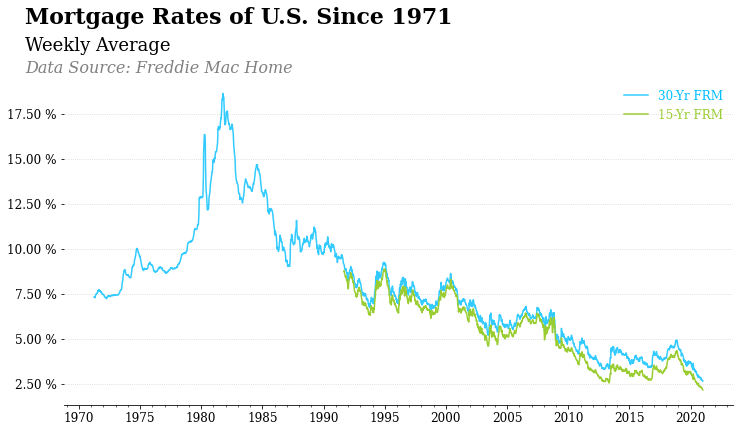

In [249]:
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import YearLocator, DateFormatter

# initiate the figure
fig = plt.figure(figsize=[12, 6])
ax0 = fig.add_subplot()

# plot
ax0.plot(mort_rates['Week'], mort_rates['30_FRM'], label='30-Yr FRM', color='deepskyblue', alpha=.8)
ax0.plot(mort_rates['Week'], mort_rates['15_FRM'], label='15-Yr FRM', color='yellowgreen')

# set axis labels
ax0.set_xlabel(None)
ax0.set_ylabel(None)

# set axis tick location and labels
ax0.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f} %'))
ax0.xaxis.set_major_locator(YearLocator(5))
ax0.xaxis.set_minor_locator(YearLocator())
ax0.xaxis.set_major_formatter(DateFormatter('%Y'))

ax0.legend(fontsize=12, framealpha=0, labelcolor='linecolor')

ax0.text(-1600, 22.5,
         'Mortgage Rates of U.S. Since 1971',
         fontsize=22,
         fontweight='bold')
ax0.text(-1600, 21,
         'Weekly Average',
         fontsize=18)
ax0.text(-1600, 19.8,
         'Data Source: Freddie Mac Home',
         fontsize=16,
         color='grey',
         fontstyle='italic')

for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)
ax0.grid(which='major', axis='y', color='lightgrey', linestyle=':');

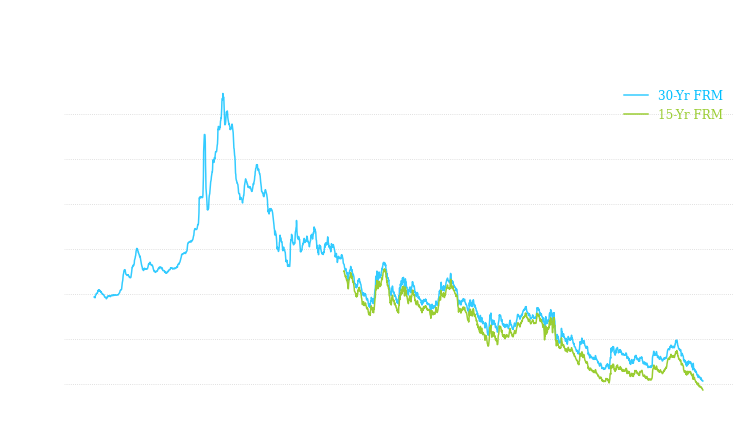

In [251]:
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import YearLocator, DateFormatter

# initiate the figure
fig = plt.figure(figsize=[12, 6])
ax0 = fig.add_subplot()

# plot
ax0.plot(mort_rates['Week'], mort_rates['30_FRM'], label='30-Yr FRM', color='deepskyblue', alpha=.8)
ax0.plot(mort_rates['Week'], mort_rates['15_FRM'], label='15-Yr FRM', color='yellowgreen')

# set axis labels
ax0.set_xlabel(None)
ax0.set_ylabel(None)

# set axis tick location and labels
ax0.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f} %'))
ax0.xaxis.set_major_locator(YearLocator(5))
ax0.xaxis.set_minor_locator(YearLocator())
ax0.xaxis.set_major_formatter(DateFormatter('%Y'))

ax0.legend(fontsize=12, framealpha=0, labelcolor='linecolor')

ax0.text(-1600, 22.5,
         'Mortgage Rates of U.S. Since 1971',
         fontsize=22,
         color='white',
         fontweight='bold')
ax0.text(-1600, 21,
         'Weekly Average',
         fontsize=18,
         color='white')
ax0.text(-1600, 19.8,
         'Data Source: Freddie Mac Home',
         fontsize=16,
         color='white',
         fontstyle='italic')

for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)
ax0.spines['bottom'].set_color('white')

ax0.tick_params(which='both', axis='x', colors='white')
ax0.tick_params(axis='y', colors='white')

ax0.grid(which='major', axis='y', color='lightgrey', linestyle=':')

fig.savefig('Saved_fig/mortage_frm.png', transparent=True, bbox_inches = 'tight');

### 4. inflation data

Data Source: [OECD Data](https://data.oecd.org/price/inflation-cpi.htm#indicator-chart)

In [51]:
inflt = pd.read_csv('original_data/DP_LIVE_03052021210857402.csv')
inflt.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,CPI,TOT,AGRWTH,M,1999-10,2.560976,NaN
1,USA,CPI,TOT,AGRWTH,M,1999-11,2.621951,NaN
2,USA,CPI,TOT,AGRWTH,M,1999-12,2.684564,NaN
3,USA,CPI,TOT,AGRWTH,M,2000-01,2.738892,NaN
4,USA,CPI,TOT,AGRWTH,M,2000-02,3.221884,NaN


In [52]:
inflt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    516 non-null    object 
 1   INDICATOR   516 non-null    object 
 2   SUBJECT     516 non-null    object 
 3   MEASURE     516 non-null    object 
 4   FREQUENCY   516 non-null    object 
 5   TIME        516 non-null    object 
 6   Value       516 non-null    float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 32.4+ KB


In [55]:
inflt['TIME'] = pd.to_datetime(inflt['TIME'], format = '%Y-%m', unit='D')

In [61]:
inflt['YearMonth'] = inflt['TIME'].dt.to_period('M')

In [213]:
inflt.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,YearMonth
0,USA,CPI,TOT,AGRWTH,M,1999-10-01,2.560976,NaN,1999-10
1,USA,CPI,TOT,AGRWTH,M,1999-11-01,2.621951,NaN,1999-11
2,USA,CPI,TOT,AGRWTH,M,1999-12-01,2.684564,NaN,1999-12
3,USA,CPI,TOT,AGRWTH,M,2000-01-01,2.738892,NaN,2000-01
4,USA,CPI,TOT,AGRWTH,M,2000-02-01,3.221884,NaN,2000-02


In [217]:
inflt.groupby('LOCATION').count()

,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,YearMonth
LOCATION,,,,,,,,
OECD,258,258,258,258,258,258,0,258
USA,258,258,258,258,258,258,0,258


In [219]:
us_inflt = inflt.query('LOCATION == "USA"').copy()

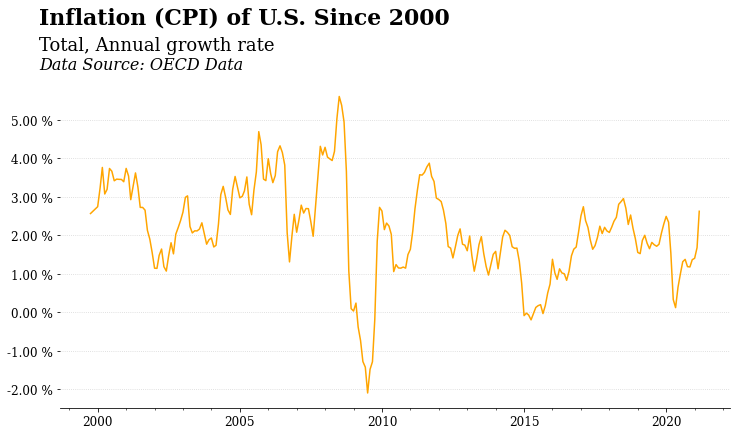

In [248]:
fig = plt.figure(figsize=[12, 6])
ax0 = fig.add_subplot()

ax0.plot(us_inflt['TIME'],us_inflt['Value'], color = 'orange')

ax0.set_xlabel(None)
ax0.set_ylabel(None)

ax0.xaxis.set_major_locator(YearLocator(5))
ax0.xaxis.set_minor_locator(YearLocator())
ax0.xaxis.set_major_formatter(DateFormatter('%Y'))

ax0.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f} %'))

ax0.text(10200, 7.5,
         'Inflation (CPI) of U.S. Since 2000',
         fontsize=22,
         color='black',
         fontweight='bold')
ax0.text(10200, 6.8,
         'Total, Annual growth rate',
         fontsize=18,
         color='black')
ax0.text(10200, 6.3,
         'Data Source: OECD Data',
         fontsize=16,
         color='black',
         fontstyle='italic')

for s in ['left', 'top', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.spines['bottom'].set_color('black')

ax0.tick_params(which='both', axis='x', colors='black')
ax0.tick_params(axis='y', colors='black')
    
ax0.grid(which='major', axis='y', color='lightgrey', linestyle=':');

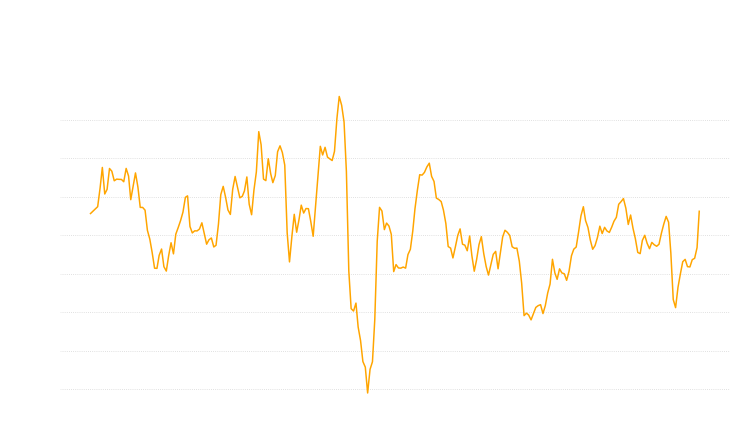

In [247]:
fig = plt.figure(figsize=[12, 6])
ax0 = fig.add_subplot()

ax0.plot(us_inflt['TIME'],us_inflt['Value'], color = 'orange')

ax0.set_xlabel(None)
ax0.set_ylabel(None)

ax0.xaxis.set_major_locator(YearLocator(5))
ax0.xaxis.set_minor_locator(YearLocator())
ax0.xaxis.set_major_formatter(DateFormatter('%Y'))

ax0.yaxis.set_major_formatter(StrMethodFormatter('{x:.2f} %'))

ax0.text(10200, 7.5,
         'Inflation (CPI) of U.S. Since 2000',
         fontsize=22,
         color='white',
         fontweight='bold')
ax0.text(10200, 6.8,
         'Total, Annual growth rate',
         fontsize=18,
         color='white')
ax0.text(10200, 6.3,
         'Data Source: OECD Data',
         fontsize=16,
         color='white',
         fontstyle='italic')

for s in ['left', 'top', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.spines['bottom'].set_color('white')

ax0.tick_params(which='both', axis='x', colors='white')
ax0.tick_params(axis='y', colors='white')
    
ax0.grid(which='major', axis='y', color='lightgrey', linestyle=':')

fig.savefig('Saved_fig/inflation.png', transparent=True, bbox_inches = 'tight');